# Task 4: Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
import project_functions3 as p3
data = pd.read_csv('../data/raw/mars-weather.csv')
dfu = p3.unprocessed(data)
dfu

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [3]:
dfp = p3.load_and_process(data)
dfp

,earth_date,sol,ls,month,min_temp,max_temp,pressure,Season
0,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Winter
1,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Winter
2,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Winter
3,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Winter
4,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Winter
...,...,...,...,...,...,...,...,...
1887,2012-08-20,14,157,Month 6,-74.0,-16.0,740.0,Winter
1888,2012-08-19,13,157,Month 6,-74.0,-15.0,732.0,Winter
1889,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,Winter
1890,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,Winter


Here we are using Malcolm's .py method chain to process the data, since we agreed it would be a good fit for all of us.

### Table 1

In [4]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
sol,1867.0,1015.670059,565.342298,10.0,546.5,1028.0,1505.5,1977.0
ls,1867.0,168.865024,105.599153,0.0,78.0,160.0,257.5,359.0
min_temp,1867.0,-76.121050,5.504098,-90.0,-80.0,-76.0,-72.0,-62.0
max_temp,1867.0,-12.510445,10.699454,-35.0,-23.0,-11.0,-3.0,11.0
pressure,1867.0,841.066417,54.253226,727.0,800.0,853.0,883.0,925.0


Here we can see that the maximum temperature is 11 degrees Celsius, the minimum temperature is -90 degrees Celsius(!), and that it generally stays below zero on Mars (the mean *maximum* temp. is about -13°C). 

### Fig. 1

In [5]:
sns.set_theme(style="whitegrid", font_scale=1.2)

Text(0.5, 1.0, 'Degree of correlation between Mars weather parameters')

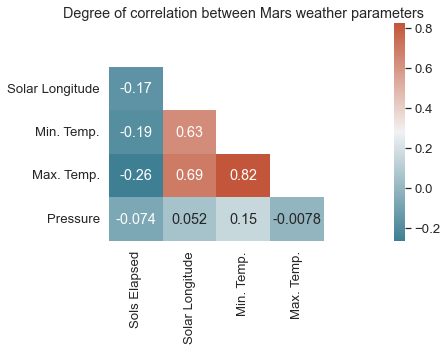

In [6]:
corr = dfp.corr()
# Method of diagonalization from stack overflow: https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap/65455988#65455988
matrix = np.triu(corr)
col = ['Sols Elapsed','Solar Longitude','Min. Temp.','Max. Temp.','Pressure']
x = col[:-1]
x.append("")
y = col[1:]
y.insert(0, "")
sns.heatmap(corr, xticklabels=x, yticklabels=y, annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True),
            mask=matrix).tick_params(bottom=False, left=False)
plt.title("Degree of correlation between Mars weather parameters")

A heat map of Mars weather parameters. The strongest correlations here are obvious: months are defined by 30 degrees of solar longitude, and so they are correlated; min. temp. and max. temp. values are each measured on the same day, and so we would expect these to be related. The next strongest correlations are between month/solar longitude and the min./max. temperatures. This makes sense since we expect some seasonal temperature variation. There is slight correlation with pressure as well.


### Fig. 2

Text(22.0, 0.5, 'Maximum Daily Temperature ($\\degree$C)')

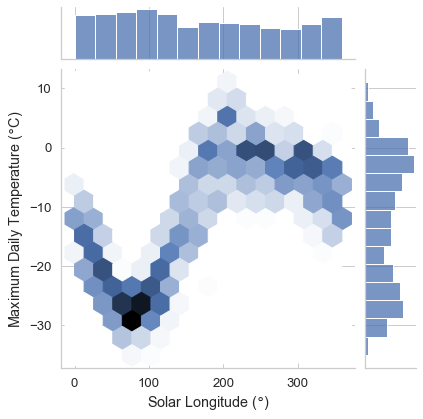

In [7]:
sp = sns.jointplot(kind = 'hex', x= 'ls', y='max_temp', data=dfp)
sns.despine()
plt.xlabel("Solar Longitude ($\degree$)")
plt.ylabel("Maximum Daily Temperature ($\degree$C)")

A hexbin plot of max. temp. vs solar longitude. We can see seasonal temperature variations here in the sinusoidal shape of the bins and the bars on the vertical axis. By definition, autumn occurs when the solar longitude is 0° to 90°, winter when it is 90° to 180°, spring when it is 180° to 270°, and summer when it is 270° to 360°. Between 0° and 90°, the temperature dips to its lowest point, close to -40°C and gradually increases to its hottest temperature of around 11°C at a solar longitude of 250°. 

It looks like Mars commonly experiences summer highs of around 0°C and winter highs of around -30°C (based on the dense regions). This means that, if there were water on Mars (or if we were to put some there), it could exist in liquid form during the hottest part of the day in the summer months, but not any other time of the year (or *day*, as we'll see in Fig. 4).

### Fig. 3

Text(0.5, 0, 'Atmospheric Pressure (Pa)')

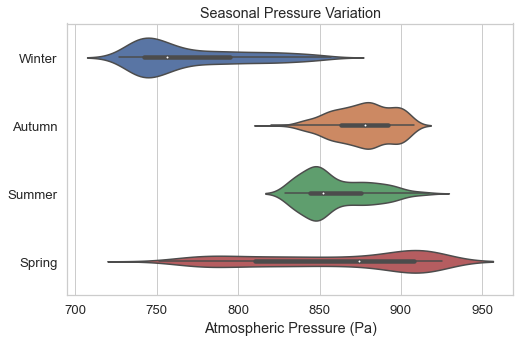

In [8]:
plt.figure(figsize=(8,5))
    
ax= sns.violinplot(x ="pressure",
             y ="Season",
             data = dfp)
ax.set_title('Seasonal Pressure Variation')
ax.set_ylabel('')
ax.set_xlabel('Atmospheric Pressure (Pa)')

A violin plot of atmospherice pressure by season. We can see that seasonal trends are present: winter has the lowest pressure and spring has the highest pressure.

Unfortunately, what this tells us is that the pressure fulctuates between about 700 Pa and 950 Pa over the course of a year. Even at its maximum, it's well below the Armstrong limit, 6.3 kPa, the pressure at which water boils at the normal temperature of the human body (source: [WorldAtlas](https://www.worldatlas.com/articles/what-is-the-armstrong-limit-the-altitude-beyond-which-no-one-can-survive.html)). On the plus side, the critical point for water occurs at around 600 Pa. Since the pressure values are all greater than 600 Pa, that means there is potential for water to exist in liquid form, and it won't just undergo deposition when the temperature gets high enough.

### Fig. 4

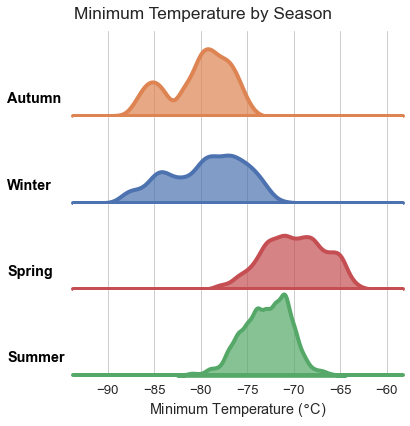

In [9]:
order_dfp = ['Autumn','Winter','Spring','Summer']
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.2, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)

r_plot = sns.FacetGrid(dfp, row='Season', hue='Season',aspect=4, height=1.5, row_order=order_dfp)

r_plot.map(sns.kdeplot, 'min_temp',clip_on=False,
      shade=True, alpha=0.7, lw=4, bw_method=0.2)
r_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
r_plot.map(label, "min_temp")

r_plot.fig.subplots_adjust(hspace=0.01)
r_plot.set_titles("")
plt.suptitle('Minimum Temperature by Season', y=0.98)
r_plot.set(yticks=[])
r_plot.despine(bottom=True, left=True)
r_plot.set_axis_labels("Minimum Temperature ($\degree$C)", "")

From this ridgeline plot, we can observe that winter and autumn experience the coldest temperatures and the minimum temperatures in spring and summer rarely go below -80° Celsius (with spring staying a little warmer then summer overall). This shows that, throughout the year, Mars experiences seasons (and they are freezing cold compared to Earth). 

### Fig. 5

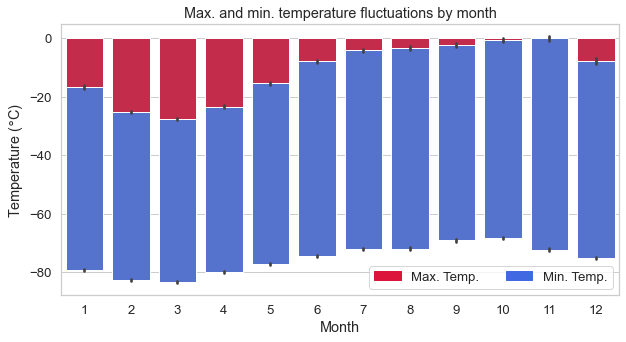

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='min_temp',data=dfp, color='royalblue')
sns.barplot(x='month',y='max_temp', data=dfp, color='crimson').set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])

plt.xlabel("Month")
plt.ylabel("Temperature ($\degree$C)")
plt.title("Max. and min. temperature fluctuations by month")

#Legend method from stack overflow (https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend)
import matplotlib.patches as mpatches

colors = ['crimson', 'royalblue']
texts = ['Max. Temp.','Min. Temp.']
patches = [mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=2 )

Stacked bar plot of average max. and min. temperatures by month. The amount of blue on the plot shows us the actual average temp. fluctuation for each day. From the graph, it appears that the average magnitude of daily temp. fluctuation is about 60°C. The averages appear relatively consistent over the seasons.

For us humans, it's not so much the temperature *fluctuation* on Mars that's the problem, but the freezing cold minimum temperatures reached. The problem would really arise for other organisms that don't have thermal clothing to take on and off. With these extreme fluctuations, most organisms on Earth would not be able to regualte their body temperatures well enough to survive.

# Conclusion

Overall, the data shows us seasonal variations (Malcolm's research question) in both temperature and pressure (Remy's research question). Its conditions make it very uninhabitable for humans as well other earth-like organisms, but it has the physical potential to house liquid water in the warmer months (Sam's research question).

Using the solar longitude (ls) as a marker, we can see Mars moves through seasons similar to Earth, where the temperature drops when nearing autumn and winter and increases from spring to summer. However, it stays much colder on that planet than ours, and it is generally below zero (which makes it much less hospitable). The pressure on Mars is another obstacle in itself - it may as well be a vacuum to us because it's so low.